# Module 7 Final Project

```
Notebook Title: nicole_ml.ipynb
Author: Nicole Hansen
GitHub Repository: https://github.com/nhansen23/datafun-07-applied
```

In [122]:
# Import Libraries
import matplotlib as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


# Part 1 - Chart a Straight Line
```
Using 10.16 to plot Celsius vs Fahrenheit
```

### Linear Relationship: Celsius vs Fahrenheit

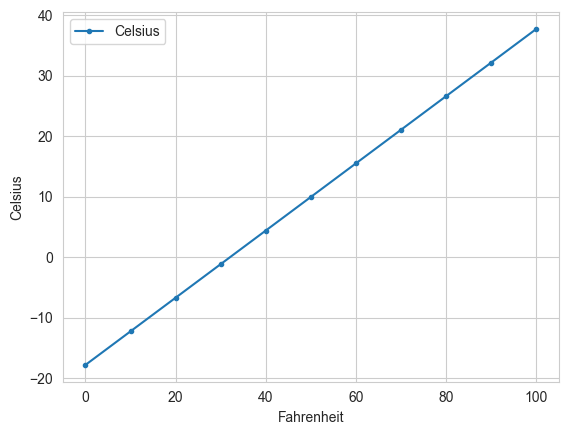

In [123]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


# Part 2 - Predict Avg High Temp in NYC in January
```
Using 10.16 to create linear regression on Average High Temperatures in NYC in January
```

### Section 1 - Data Acquisition

In [124]:
nyc_df = pd.read_csv('ch15-practice\\ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [125]:
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [126]:
nyc_df.tail()

,Date,Temperature,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


### Section 3 - Data Cleaning

In [127]:
# I do not need to update column names nor remove the last two digits on date
# as my data file was already set that way from my initial practice

# nyc_df.columns = ['Date', 'Temperature','Anomaly']

### Section 4 - Descriptive Statistics

In [128]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [129]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [130]:
linear_regression.slope

0.014771361132966163

In [131]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [132]:
# Predict the average high temp in January for 2019

linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [133]:
# Predict the average high temp in January for 1890

linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [134]:
# Predict the average high temp in January for 2024

linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

(10.0, 70.0)

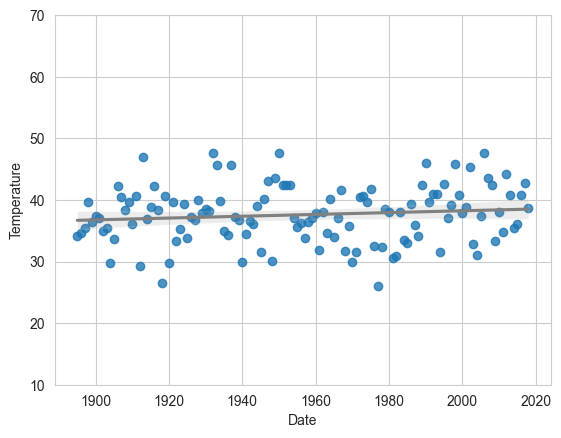

In [135]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature,  line_kws=dict(color='gray'))

axes.set_ylim(10, 70)


# Part 3 - Predict Avg High Temp in NYC in January
```
Using 15.4 to create linear regression on Average High Temperatures in NYC in January.
This section will use a different method than the previous section.
```

### Section 1 - Build the Model

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)

X_train.shape

(93, 1)

In [137]:
X_test.shape

(31, 1)

In [138]:
# Train the Model

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In [139]:
linear_regression.coef_

array([0.01939167])

In [140]:
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

In [141]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [142]:
# Use the model to predict the average high temp in January for 2024

predict = (lambda x: linear_regression.coef_ * x +
                     linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 3 - Visualizations

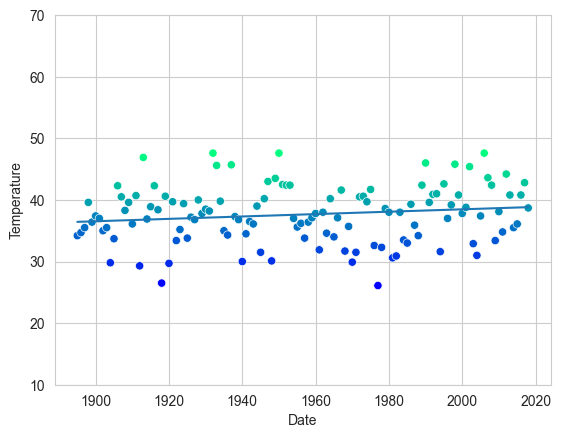

In [143]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter',legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

line = plt.plot(x, y)

# Part 4 - Comparing Methods

```
The first method returns a slightly smaller slope in the linear regression.  This results in the prediction
of the average high temperature in July for 2024 to be slightly lower than the prediction provided in the second method.
In the first method, the predicted average temperature is 38.59 degrees, while the second model predicts an
average temperature of 38.94 degrees.
```

# Bonus Project: California Housing Dataset
```
Using the California housing dataset to continue practicing skills from
chapter 10 and chapter 15
```

### Bonus Project - Data Acquisition

In [147]:
from sklearn.datasets import fetch_california_housing

cali = fetch_california_housing()

### Bonus Project - Descriptive Statistics

In [148]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [149]:
cali.data.shape

(20640, 8)

In [150]:
cali.target.shape

(20640,)

In [151]:
# Return field names
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Bonus Project - Explore Data

In [153]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)


In [155]:
cali_df = pd.DataFrame(cali.data, columns=cali.feature_names)

cali_df['MedHouseValue']=pd.Series(cali.target)

cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [156]:
cali_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09,0.781
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21,0.771
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22,0.923
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32,0.847
20639,2.3886,16.0,5.2547,1.1623,1387.0,2.6170,39.37,-121.24,0.894


In [157]:
cali_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Bonus Project - Visualizations